https://www.kaggle.com/shayanfazeli/heartbeat

Objectives: Can you identify myocardial infarction ?

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
mitbih_train=pd.read_csv("heartbeat/mitbih_train.csv", header=None)
mitbih_test=pd.read_csv("heartbeat/mitbih_test.csv", header=None)

In [32]:
print( "Shape of the train dataset", mitbih_train.shape )
print( "Shape of the test data set", mitbih_test.shape )

Shape of the train dataset (87554, 188)
Shape of the test data set (21892, 188)


In [33]:
x=np.arange(0,mitbih_train.shape[1])
nombres=list()
for i in range(mitbih_train.shape[1]):
    nombres.append( "signal_"+str(x[i]) )
mitbih_train.columns=nombres

In [34]:
print( "Information of the train dataset", mitbih_train.info() )
print("Description of the train dataset", mitbih_train.describe() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, signal_0 to signal_187
dtypes: float64(188)
memory usage: 125.6 MB
Information of the train dataset None
Description of the train dataset            signal_0      signal_1      signal_2      signal_3      signal_4  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           signal_5      signal_6      signal_7     

In [47]:
mitbih_train=mitbih_train.rename(index=str,columns={"signal_187":"Label"})

In [65]:
print( "Counts on different classes\n", mitbih_train.groupby("Label").count().signal_0 )

print( "\nPercentage of the different classes\n", 
      mitbih_train.groupby("Label").count().signal_0*100/mitbih_train.shape[0] )

Counts on different classes
 Label
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: signal_0, dtype: int64

Percentage of the different classes
 Label
0.0    82.772917
1.0     2.539005
2.0     6.610777
3.0     0.732120
4.0     7.345181
Name: signal_0, dtype: float64


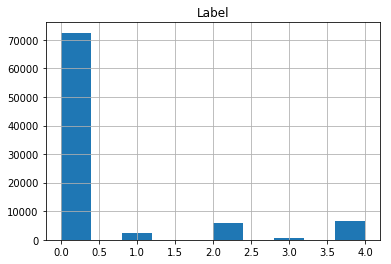

In [49]:
mitbih_train.hist(column="Label")
plt.show()

In [68]:
heartbeat=list()
for i in range(mitbih_train.shape[0]):
    if mitbih_train.Label[i]==0:
        heartbeat.append(0)
    else:
        heartbeat.append(1)

In [80]:
mitbih_train["Heart"]=pd.Series(heartbeat)

In [83]:
Y2=mitbih_train.Heart
Y1=mitbih_train.Label
X=mitbih_train.drop(["Heart","Label"],axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y2,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
model = ["Tree"]
learners = [DecisionTreeClassifier(random_state = 1, max_depth=20, max_features=10)]

In [ ]:
%%time

results=[]
for i in range(len(model)):
    learners[i].fit(X_train, y_train)
    print("Accuracy train", model[i], ":", learners[i].score(X_train, y_train))
    print("Accuracy test ", model[i], ":", learners[i].score(X_test, y_test))

Accuracy train Tree : 0.9907647625108098
Accuracy test  Tree : 0.9548482887273004


/home/jose/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
